In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "C:/DSA COURSE/DataSets/car_age_price.csv"

The given dataset contains price of second-hand Hyundai grand i10 car with respect to year of making. Find the best linear relationship between year and price. Can you predict the possible price of a 2022 model second-hand grand i10? Please learn about lasso regression and create a model along with linear regression. Find out which one is performing better

In [3]:
#load the dataset
data = pd.read_csv(url)

In [6]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [7]:
#check the shape of dataset
data.shape

(112, 2)

In [8]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [9]:
#checking for null values
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [14]:
#check the correlation matrix 
corr_matrix = data.corr()
corr_matrix    

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


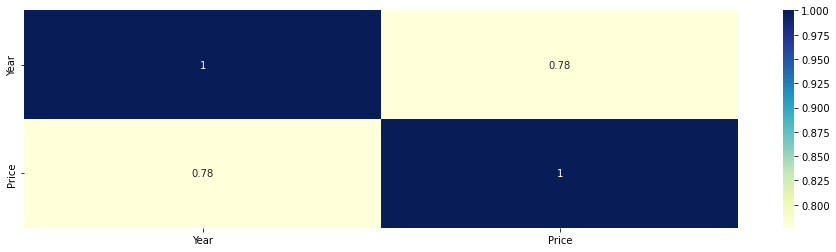

In [15]:
#Heatmap
plt.subplots(figsize=(16,4))
sns.heatmap(corr_matrix,annot = True,cmap="YlGnBu")
plt.show()

In [16]:
#Positive correlation between year and price

Target Value---->Price

In [ ]:
data.columns

In [17]:
#Independent value
x= data["Year"]
x

0      2018
1      2019
2      2019
3      2018
4      2018
       ... 
107    2016
108    2014
109    2015
110    2016
111    2015
Name: Year, Length: 112, dtype: int64

In [18]:
# Dependent/target value
y=data["Price"]
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [19]:
#Shape of x and y
print("Shape of x = ",x.shape)
print("Shape of y = ",y.shape)

Shape of x =  (112,)
Shape of y =  (112,)


In [20]:
x= x.values.reshape(-1,1)
y= y.values.reshape(-1,1)

In [21]:
#Shape of x and y after reshape
print("Shape of x = ",x.shape)
print("Shape of y = ",y.shape)

Shape of x =  (112, 1)
Shape of y =  (112, 1)


In [22]:
#Standard Scaling of x and y 
from sklearn.preprocessing import StandardScaler
Std_Scaler = StandardScaler()
x= Std_Scaler.fit_transform(x)
y = Std_Scaler.fit_transform(y)

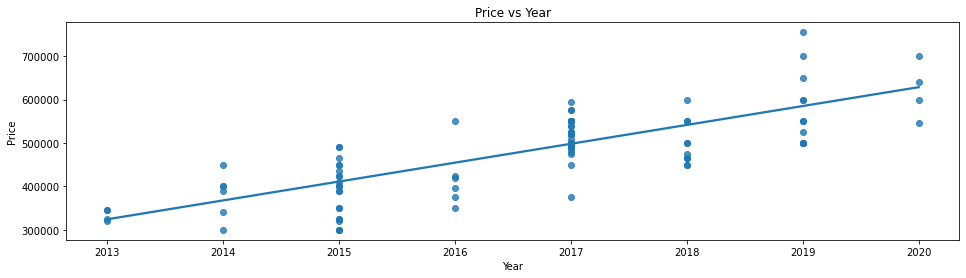

In [23]:
# Regression Plot for Year and Price
plt.subplots(figsize=(16,4))
sns.regplot(data=data, x='Year', y='Price', ci=None)
plt.title("Price vs Year")
plt.show()

In [24]:
#Split our dataset into trainnig and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42, test_size = 0.2)

Linear Regression

In [25]:
#create sklearn linear model 
from sklearn.linear_model import LinearRegression
#LinearRegression object 
linear_regression = LinearRegression()
#fit the training dataset in it.
model = linear_regression.fit(x_train,y_train)
predictions = model.predict(x_test)

In [26]:
#Mean Squared Error and R Square value
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error",mean_squared_error(y_test,predictions))
print("R Square value",r2_score(y_test,predictions))

Mean Squared Error 0.5247067733340601
R Square value 0.367593134258979


 R square value is 0.36.So the model is not a bad fit

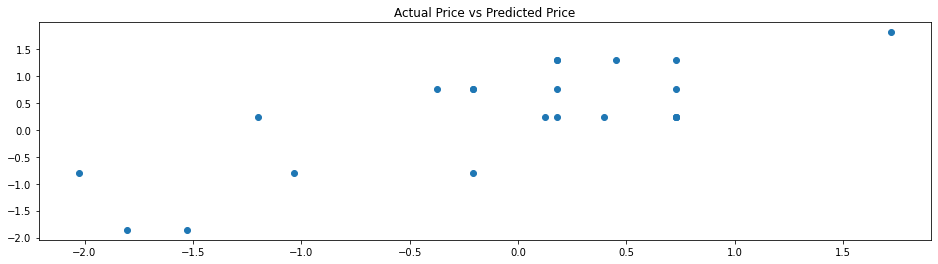

In [27]:
# Visualize Actual price and Predicted price
plt.subplots(figsize=(16,4))
plt.scatter(y_test,predictions)
plt.title("Actual Price vs Predicted Price")
plt.show()

 Lasso Regression

In [28]:
#import lasso regression from sklearn library
from sklearn.linear_model import Lasso

In [29]:
#Train the model
lasso = Lasso(alpha = 1)
lasso.fit(x_train, y_train)
y_prediction = lasso.predict(x_test)

In [30]:
#calculate Mean Squared Error
from sklearn.metrics import mean_squared_error,r2_score
print("Mean Squared Error",mean_squared_error(y_test,y_prediction))
print("R Square value",r2_score(y_test,y_prediction))

Mean Squared Error 0.831681687996886
R Square value -0.0023907377034251276


Here R square value  is -0.002 so there is week relationship between varibles .So the model is not fit good. Its a worse one

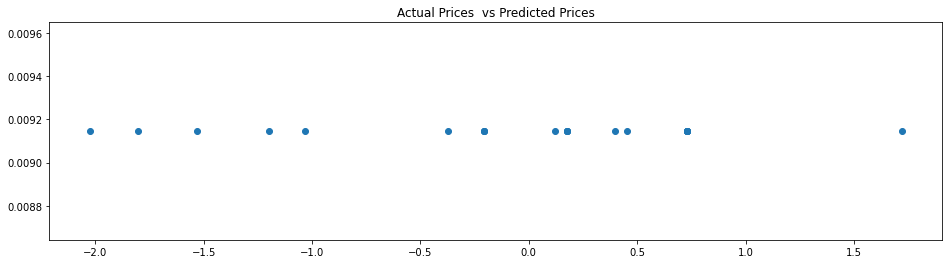

In [31]:
plt.subplots(figsize=(16,4))
plt.scatter(y_test,y_prediction)
plt.title("Actual Prices  vs Predicted Prices")
plt.show()

Conclusion: Linear Regression is performing better compared to lasso regression